In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 박찬서님 코드에서 배운 pandas 데이터 설정 코드
pd.options.display.float_format = '{:20,.0f}'.format

In [3]:
company = pd.read_csv('company_nps_data.csv', encoding='cp949')

In [4]:
company.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,"99,801","99,801","99,801","99,801","99,801","99,801"
mean,"276,298","30,535,893","2,017",7,"9,734,079",38
std,"133,903","301,664,669",1,4,"43,472,560",147
min,63,"-7,882,176","2,015",1,0,0
25%,"165,530","1,409,760","2,016",4,"1,181,160",6
50%,"259,149","3,573,585","2,017",7,"2,332,760",11
75%,"382,656","9,582,321","2,018",10,"5,591,860",24
max,"5,159,723","11,328,779,396","2,019",12,"978,067,260","3,133"


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [6]:
# 이상치 확인
np.where(company['월별_직원수'] == 0)

(array([ 4450,  6162,  7251, 12176, 20070, 33869, 39671, 49592, 54026,
        64139, 69239, 82809, 93481], dtype=int64),)

In [7]:
np.where(company['연매출액'] < 0)

(array([ 7516,  7617,  8595, 23150, 36048, 37489, 51605, 56276, 64094,
        67889, 93521, 95251], dtype=int64),)

In [8]:
# 이상치 내용 정리
# 월별 직원수가 0으로 뜨는 경우는 세 가지이다.
# 1. 마지막 정보에서 0
# 2. 연속된 데이터 중간에 0
# 3. 기업의 전체 데이터가 0만 있음
# 1의 경우에는 기업이 문을 닫은 경우라고 판단할 수 있고, 3의 경우에는 무의미한 데이터라 판단하고 제거한다.
# 2의 경우에는 5.4 회의 중 논의가 있었고, 연속된 데이터 가운데 하나가 빠져도 무방할 것으로 얘기하고 제거한다.
# 이미 중간중간 연속된 데이터가 아닌 경우가 존재하기 때문이다.

In [9]:
# 이상치 제거
company = company.drop(index = (company.query('월별_직원수 == 0').index) | (company.query('연매출액 < 0').index))

C:\Users\hwang\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hwang\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hwang\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hwang\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Suppor

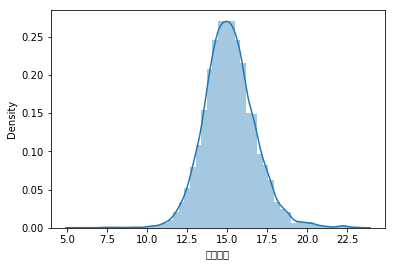

In [11]:
# 전체 기업의 연매출액 분포
company_mean_year = company.groupby(['회사ID', '년도']).agg('mean')
sns.distplot(np.log(company_mean_year['연매출액']))
plt.savefig('./정규성.png')

In [12]:
# 전체 기업의 연매출액을 log씌웠더니 정규성을 확인할 수 있었다.

In [13]:
# 전체 기업의 연도 
years = company[['회사ID', '년도']].drop_duplicates()

In [14]:
years['회사ID'].value_counts()

442467     5
237625     5
395238     5
296819     5
404192     5
          ..
383847     1
297829     1
1065828    1
287584     1
532360     1
Name: 회사ID, Length: 4998, dtype: int64

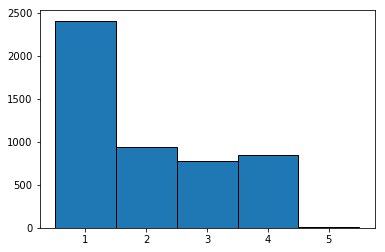

In [15]:
plt.hist(years['회사ID'].value_counts(), bins = np.arange(0,6) + 0.5, ec="k")
plt.show()

In [16]:
# 1개년치 데이터만 있는 기업이 2409개로 전체의 절반에 가깝는 것을 확인한다.

In [17]:
### 유니콘 기업 찾기

# 국내 유니콘 기업의 매출액을 보면 2 케이스로 나눌 수 있다.
# 1. 일정 규모의 매출액을 유지한다.
# 2. 매출액이 매년 가파른 상승세를 보인다.

# 이 때 케이스 1의 유니콘이 어떻게 일정 규모의 매출액을 낼 수 있을지 추론해보면 다음과 같다.
# 1) 초반에는 케이스 2의 기업들처럼 성장했을 것이다.
# 2) 엄청난 히트상품을 만들어 단기간에 엄청한 매출액을 썼다. (예 : 크래프톤의 배그, 지피클럽의 꿀광마스크)

# 여기서 2)의 경우, 즉 현 시점에서는 매출액이 적어도 미래에는 히트 상품을 낼 기업을 찾아내는 것은 주어진 데이터로 파악하기에 한계가 있다고 느낀다. 
# 따라서 가파른 매출액 상승세를 보이는 기업이 유니콘이 될 수 있다고 가정한다.
# 또한 연간 매출액 상승률을 고려하기 때문에 위에서 살펴본 1개년치 데이터만 있는 기업은 유니콘 선정 대상에서 제외한다.


# 유니콘 기업은 다음과 같이 가정한다.

# 1. 매출액이 천억 이상이다.
#  > 옐로모바일 제외 국내 10개 유니콘 기업 중 에이프로젠을 제외하면 모든 기업이 매출액 천억을 달성한 바 있다.
# 2. 연간 매출 성장률이 높다.
#  > 5.4 회의 중에도 합의된 내용이지만 높은 성장률 또한 매출액 천억과 더불어 유니콘 기업의 특성이라고 판단한다.
# 3. 적정 규모의 직원 수를 가지고 있다.
#  > 국내 유니콘 기업의 자료를 살펴보며 주관적으로 10명 이상, 1500명이라는 범위를 설정했다. 추후에 논의가 더 필요한 부분임.


In [18]:
years_series = years['회사ID'].value_counts()

In [19]:
# 1개년치 데이터만 있는 기업들을 제외하는 company3 DF를 만든다.
company_year_count = pd.DataFrame({'회사ID':years_series.index, 'year_count':years_series.values})
company_year_count

,회사ID,year_count
0,442467,5
1,237625,5
2,395238,5
3,296819,5
4,404192,5
...,...,...
4993,383847,1
4994,297829,1
4995,1065828,1
4996,287584,1


In [20]:
company2 = pd.merge(company, company_year_count, left_on = '회사ID', right_on = '회사ID', how='left')
company2

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,year_count
0,233757,41688077,2018,7,8912380,36,4
1,123464,1760695,2018,3,942380,5,3
2,342124,3221341,2018,7,781180,4,2
3,386420,4815584,2015,11,3795900,14,4
4,129243,9799736,2018,10,40724680,151,4
...,...,...,...,...,...,...,...
99771,171439,4630622,2017,2,2402740,11,4
99772,239388,1045021,2018,10,1428800,9,1
99773,272304,181898,2018,3,392560,4,1
99774,362194,2100218,2018,12,874780,3,4


In [21]:
numb = company2[company2['year_count'] == 1].index
numb
company3 = company2.drop(numb)

In [22]:
company3 = company3.drop('year_count', axis = 1)
company3

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99769,466886,119791,2018,2,336220,4
99770,150135,7119441,2016,12,4872520,25
99771,171439,4630622,2017,2,2402740,11
99774,362194,2100218,2018,12,874780,3


In [23]:
# 기업의 기간 내에 평균연매출액상승률을 구하는 sales_ROR3 DF를 만든다.
sales_ROR = company3[['회사ID', '년도', '연매출액']].drop_duplicates()
sales_ROR = sales_ROR.sort_values(['회사ID', '년도'])
sales_ROR

,회사ID,년도,연매출액
19581,14271,2015,1199495
4502,14271,2016,4257715
8563,14271,2017,5005248
11968,14271,2018,8388401
6454,14271,2019,9039340
...,...,...,...
5053,516653,2016,1745520
10631,516653,2017,1956460
1653,516653,2018,1500046
5278,620445,2018,1953553


In [24]:
sales_ROR['평균연매출상승률'] =  (sales_ROR['연매출액'] / sales_ROR.sort_values(by = ['회사ID', '년도'], ascending = True).groupby('회사ID')['연매출액'].shift(1) - 1) * 100
sales_ROR.head(20)

,회사ID,년도,연매출액,평균연매출상승률
19581,14271,2015,1199495,nan
4502,14271,2016,4257715,255
8563,14271,2017,5005248,18
11968,14271,2018,8388401,68
6454,14271,2019,9039340,8
4741,44851,2016,939238,nan
10677,44851,2018,1189946,27
51764,59533,2015,194704,nan
13003,59533,2016,207762,7
3367,59533,2017,124299,-40


In [25]:
sales_ROR2 = sales_ROR.dropna()
sales_ROR3 = sales_ROR2[['평균연매출상승률']].groupby(sales_ROR2['회사ID']).mean()

In [26]:
# 위에서 만든 company3와 sales_ROR3 데이터를 취합하여
# 연매출액 천억 이상이 존재하며, 일정 규모의 월별 직원수를 가진 기업들 중 평균연매출상승률이 가장 높은 기업들을 sort한다.
company_fit = pd.merge(company3, sales_ROR3, left_on = '회사ID', right_on = '회사ID', how='left')

In [27]:
company_fit2 = company_fit[(company_fit['연매출액'] > 100000000) & ((company_fit['월별_직원수']) > 10) & ((company_fit['월별_직원수']) < 1500)]

In [28]:
# 조건에 만족하는 상위 10개 기업을 추려보면 다음과 같다.
company_fit3 = company_fit2[['회사ID', '평균연매출상승률']].drop_duplicates()
company_fit3.sort_values(by = ['평균연매출상승률'], axis = 0, ascending = False).head(10)

,회사ID,평균연매출상승률
1435,294620,476
3228,403470,83
2028,127366,62
17932,420165,48
841,231703,44
7212,294337,41
2615,294790,41
4347,428817,37
5152,469677,31
563,420046,24


In [39]:
# 평균연매출상승률 외 다른 요인은?
company_fit.sort_values(['회사ID', '년도', '월'])

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,평균연매출상승률
14705,14271,1199495,2015,11,2571840,11,87
33340,14271,1199495,2015,12,3558780,15,87
29956,14271,4257715,2016,1,3358340,15,87
20720,14271,4257715,2016,2,3142340,14,87
3392,14271,4257715,2016,3,3016340,13,87
...,...,...,...,...,...,...,...
53139,620445,767324,2019,8,525240,3,-61
13361,620445,767324,2019,9,525240,3,-61
20053,620445,767324,2019,10,525240,3,-61
33790,620445,767324,2019,11,826740,4,-61


In [81]:
# 1인당 연평균 매출액과 1인당 평균 임금 상승률
company_mean = company_fit.groupby(['회사ID', '년도']).mean()
company_mean

연매출액                    월             월별_연금보험료  \
회사ID   년도                                                                    
14271  2015            1,199,495                   12            3,065,310   
       2016            4,257,715                    6            3,683,752   
       2017            5,005,248                    6            3,652,973   
       2018            8,388,401                    6            4,231,797   
       2019            9,039,340                    6            4,796,880   
...                          ...                  ...                  ...   
516653 2016            1,745,520                    6              443,260   
       2017            1,956,460                    6              557,710   
       2018            1,500,046                    8              549,920   
620445 2018            1,953,553                    4              605,720   
       2019              767,324                    8              662,720   

                          월별_직원수             평균연매출상승률  
회사ID   년도                                              
14271  2015                   13                   87  
       2016                   15                   87  
       2017                   17                   87  
       2018                   20                   87  
       2019                   22                   87  
...                          ...                  ...  
516653 2016                    4                   -6  
       2017                    5                   -6  
       2018                    4                   -6  
620445 2018                    4                  -61  
       2019                    4                  -61  

[7699 rows x 5 columns]

In [82]:
company_mean['1인당연평균매출액상승률'] = (company_mean['연매출액'] / company_mean['월별_직원수'])
company_mean['1인당연평균임금상승률'] = (company_mean['월별_연금보험료'] / company_mean['월별_직원수'])
company_mean2 = company_mean.groupby(['회사ID']).pct_change()*100
company_mean2

연매출액                    월             월별_연금보험료  \
회사ID   년도                                                                    
14271  2015                  nan                  nan                  nan   
       2016                  255                  -43                   20   
       2017                   18                    0                   -1   
       2018                   68                    0                   16   
       2019                    8                    0                   13   
...                          ...                  ...                  ...   
516653 2016                  nan                  nan                  nan   
       2017                   12                    0                   26   
       2018                  -23                   18                   -1   
620445 2018                  nan                  nan                  nan   
       2019                  -61                  141                    9   

                          월별_직원수             평균연매출상승률         1인당연평균매출액상승률  \
회사ID   년도                                                                    
14271  2015                  nan                  nan                  nan   
       2016                   15                    0                  209   
       2017                   12                    0                    5   
       2018                   20                    0                   39   
       2019                   11                    0                   -3   
...                          ...                  ...                  ...   
516653 2016                  nan                  nan                  nan   
       2017                   14                    0                   -2   
       2018                  -11                    0                  -14   
620445 2018                  nan                  nan                  nan   
       2019                  -14                    0                  -54   

                     1인당연평균임금상승률  
회사ID   년도                         
14271  2015                  nan  
       2016                    5  
       2017                  -12  
       2018                   -4  
       2019                    2  
...                          ...  
516653 2016                  nan  
       2017                   10  
       2018                   11  
620445 2018                  nan  
       2019                   28  

[7699 rows x 7 columns]

In [83]:
company_mean3 = company_mean2.drop(['연매출액', '월', '월별_연금보험료', '월별_직원수', '평균연매출상승률'], axis = 1)

In [143]:
alldata = pd.merge(company_fit2, company_mean3, left_on = ['회사ID', '년도'], right_on = ['회사ID', '년도'], how='left')
alldata.sort_values(['회사ID', '년도', '월']).head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,평균연매출상승률,1인당연평균매출액상승률,1인당연평균임금상승률
1646,126516,402601664,2017,10,281895240,742,-35,1,4
84,126516,402601664,2017,11,281768960,742,-35,1,4
786,126516,402601664,2017,12,282895220,746,-35,1,4
956,126521,554767229,2017,7,540567300,1487,-0,5,5
1281,126521,554767229,2017,8,530803720,1461,-0,5,5
2105,126521,554767229,2017,9,525969420,1447,-0,5,5
1128,126521,554767229,2017,10,527251000,1452,-0,5,5
900,126521,554767229,2017,11,537576220,1483,-0,5,5
2037,126521,554767229,2017,12,536986760,1491,-0,5,5
85,126521,567246558,2018,1,537912360,1493,-0,3,2


In [144]:
alldata = alldata.dropna().sort_values(['회사ID', '년도', '월'])
alldata

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,평균연매출상승률,1인당연평균매출액상승률,1인당연평균임금상승률
1646,126516,402601664,2017,10,281895240,742,-35,1,4
84,126516,402601664,2017,11,281768960,742,-35,1,4
786,126516,402601664,2017,12,282895220,746,-35,1,4
956,126521,554767229,2017,7,540567300,1487,-0,5,5
1281,126521,554767229,2017,8,530803720,1461,-0,5,5
...,...,...,...,...,...,...,...,...,...
1850,510329,143513683,2018,8,137202420,609,-1,9,0
1282,510329,143513683,2018,9,137436680,609,-1,9,0
1987,510329,143513683,2018,10,138112640,614,-1,9,0
582,510329,143513683,2018,11,136699180,606,-1,9,0


In [152]:
alldata = alldata[['회사ID', '년도', '연매출액', '평균연매출상승률', '1인당연평균매출액상승률', '1인당연평균임금상승률']].drop_duplicates().sort_values(['회사ID', '년도'])
alldata

,회사ID,년도,연매출액,평균연매출상승률,1인당연평균매출액상승률,1인당연평균임금상승률
1646,126516,2017,402601664,-35,1,4
956,126521,2017,554767229,-0,5,5
85,126521,2018,567246558,-0,3,2
302,126538,2016,671580655,6,7,2
305,126538,2017,716851120,6,-2,4
...,...,...,...,...,...,...
571,440030,2017,389008320,4,-8,1
880,469677,2018,108023614,31,0,-1
1978,510329,2016,136264259,-1,-9,-1
1573,510329,2017,134718002,-1,-0,2


In [166]:
print(lm.fit(alldata[['년도', '평균연매출상승률', '1인당연평균매출액상승률', '1인당연평균임금상승률']], alldata['연매출액']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [148]:
alldata2 = alldata.drop('년도', axis = 1)

In [149]:
alldata2 = alldata2.groupby(['회사ID']).mean().sort_values(['회사ID'])
alldata2

,연매출액,평균연매출상승률,1인당연평균매출액상승률,1인당연평균임금상승률
회사ID,,,,
126516,"402,601,664",-35,1,4
126521,"561,006,894",-0,4,4
126538,"703,444,375",6,3,3
126606,"1,015,898,894",3,5,4
126664,"327,175,292",11,7,3
...,...,...,...,...
426429,"436,043,800",-7,-11,0
428817,"142,815,430",37,109,3
440030,"382,667,836",4,-6,1


In [151]:
alldata2.sort_values(by = ['평균연매출상승률'], ascending = False).head(10)

,연매출액,평균연매출상승률,1인당연평균매출액상승률,1인당연평균임금상승률
회사ID,,,,
294620,"915,019,831",476,462,1
403470,"101,101,950",83,15,4
127366,"191,105,832",62,58,1
420165,"165,961,753",48,57,9
231703,"121,053,193",44,41,1
294337,"146,274,359",41,24,0
294790,"106,819,538",41,197,2
428817,"142,815,430",37,109,3
469677,"108,023,614",31,0,-1


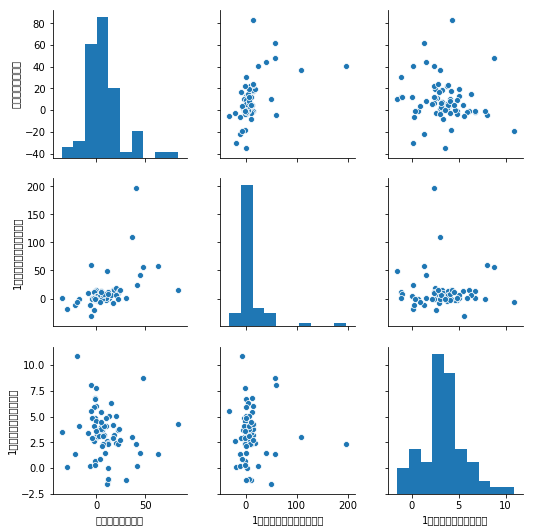

In [129]:
# 다중공선성에 문제가 있지 않을까?
sns.pairplot(alldata2.drop(294620)[['평균연매출상승률', '1인당연평균매출액상승률', '1인당연평균임금상승률']])